In [864]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
np.random.seed(17)
sns.set_theme(style="darkgrid")

# Analysis Questions
<ul>
<li>Stingy Vs Greedy (Wins)
<li>Station vs Utility
<li>Default vs greedy
<li>Default vs stingy
<li>All 5 combat

## Stingy VS Greedy


In [865]:
df = pd.read_csv("./data_unused/GreedyStingy.csv")
df.dropna(inplace=True)
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,STINGY,712.0,5.0,1.0,0.0,6.0
1,STINGY,914.0,8.0,0.0,0.0,8.0
2,GREEDY,3345.0,18.0,1.0,2.0,21.0
3,STINGY,1675.0,4.0,0.0,0.0,4.0
4,STINGY,1702.0,2.0,2.0,0.0,4.0


In [866]:
df.groupby("strategy").median()


,money,countries,utilities,stations,totalLandsOwned
strategy,,,,,
GREEDY,3489.5,16.0,2.0,3.0,20.0
STINGY,1475.0,3.0,0.0,1.0,4.0


It seems that on aveage Greedy has more lands of each type amd more money compared to Stingy

In [867]:
df['strategy'].value_counts(normalize=True)

GREEDY    0.582788
STINGY    0.417212
Name: strategy, dtype: float64

Greedy won nearly 59% of the time while Stingy won 41% of the time. But is this statistically significant?

In [868]:
diff = []
greedy_ps = []
stingy_ps = []
for _ in range(1000):
    bootsample = df.sample(df.shape[0], replace=True)
    greedy_p = bootsample['strategy'].value_counts()['GREEDY']/bootsample.shape[0]
    stingy_p = bootsample['strategy'].value_counts()['STINGY']/bootsample.shape[0]
    greedy_ps.append(greedy_p)
    stingy_ps.append(stingy_p)
    diff.append(greedy_p - stingy_p)

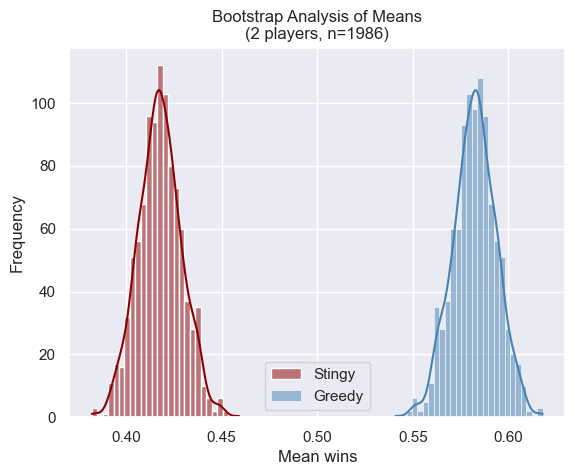

In [869]:
sns.histplot(stingy_ps, color='darkRed', kde=True, label="Stingy")
sns.histplot(greedy_ps, color='steelBlue', kde=True, label="Greedy")
plt.xlabel("Mean wins")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Means\n(2 players, n={df.shape[0]-1})")
plt.legend();

They seem to come from different distributions.

(0.08580397584297933, 0.10768042274786112)

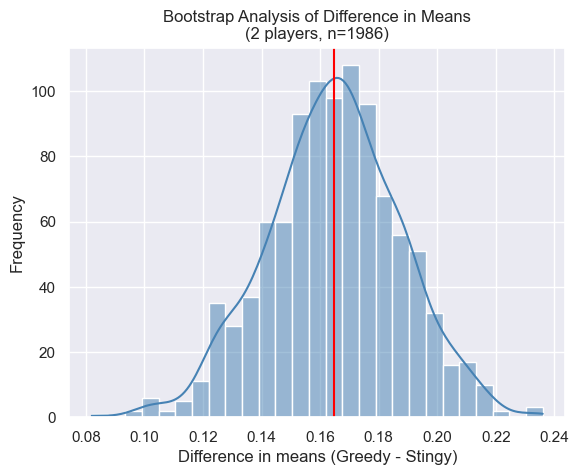

In [870]:
sns.histplot(diff, color='steelBlue', kde=True)
plt.xlabel("Difference in means (Greedy - Stingy)")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Difference in Means\n(2 players, n={df.shape[0]-1})")
plt.axvline(np.mean(diff), color='red')
np.percentile(diff, 0.025), np.percentile(diff, 0.975)

The 95% confidence interval (0.11, 0.126) does not contain 0. So with 95% confidence, Greedy wins on average more that Stingy.

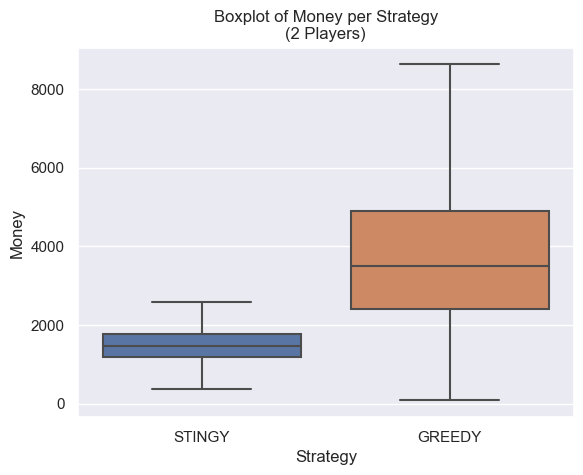

In [871]:
sns.boxplot(x='strategy', y='money', data=df, showfliers=False)
plt.title('Boxplot of Money per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Money')
plt.show();

From the boxplot, on average, Stingy tends to end winning with less than 2000$ while Greedy tends to win with roughly 4000$.

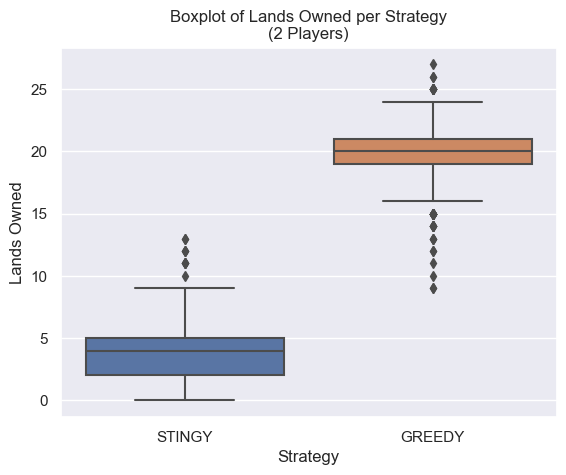

In [872]:
sns.boxplot(x='strategy', y='totalLandsOwned', data=df)
plt.title('Boxplot of Lands Owned per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Lands Owned')
plt.show();

From the boxplot, on average, Stingy tends to win with less lands owned compared to Greedy

## Station Vs Utility

In [873]:
df = pd.read_csv("./data_unused/StationUtility.csv")
df.dropna(inplace=True)
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,STATION_GUY,38169.0,12.0,0.0,4.0,16.0
1,UTILITY_GUY,1096.0,5.0,0.0,1.0,6.0
2,STATION_GUY,1447.0,7.0,0.0,4.0,11.0
3,UTILITY_GUY,1022.0,7.0,0.0,1.0,8.0
4,STATION_GUY,710.0,4.0,0.0,4.0,8.0


In [874]:
df.groupby("strategy").median()


,money,countries,utilities,stations,totalLandsOwned
strategy,,,,,
STATION_GUY,4906.0,11.0,1.0,3.0,14.0
UTILITY_GUY,9017.0,11.0,1.0,1.0,14.0


It seems that on average, the two strategies have the same number of lands owned of each type, however, Station Guy owns more stations.

In [875]:
df['strategy'].value_counts(normalize=True)

STATION_GUY    0.624718
UTILITY_GUY    0.375282
Name: strategy, dtype: float64

Station Guy won nearly 59% of the time while Utility Guy won 41% of the time. But is this statistically significant?

In [876]:
diff = []
greedy_ps = []
stingy_ps = []
for _ in range(1000):
    bootsample = df.sample(df.shape[0], replace=True)
    greedy_p = bootsample['strategy'].value_counts()['STATION_GUY']/bootsample.shape[0]
    stingy_p = bootsample['strategy'].value_counts()['UTILITY_GUY']/bootsample.shape[0]
    greedy_ps.append(greedy_p)
    stingy_ps.append(stingy_p)
    diff.append(greedy_p - stingy_p)

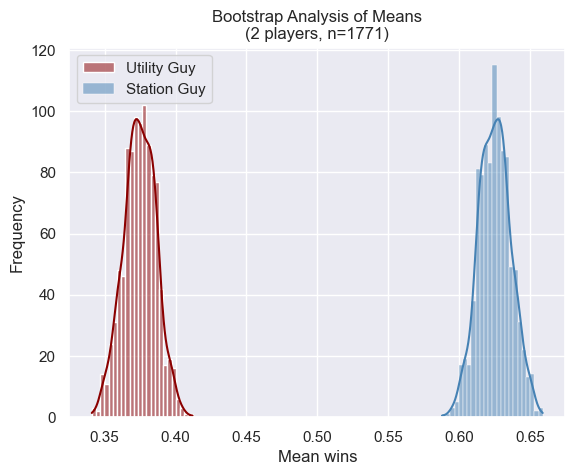

In [877]:
sns.histplot(stingy_ps, color='darkRed', kde=True, label="Utility Guy")
sns.histplot(greedy_ps, color='steelBlue', kde=True, label="Station Guy")
plt.xlabel("Mean wins")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Means\n(2 players, n={df.shape[0]-1})")
plt.legend();

They seem to come from different distributions.

(0.17889108352144473, 0.19948109480812642)

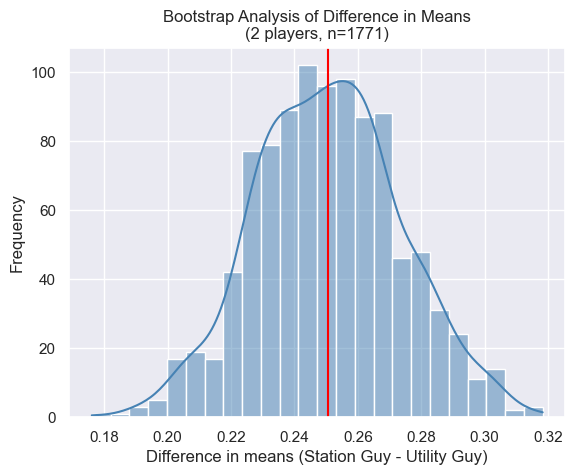

In [878]:
sns.histplot(diff, color='steelBlue', kde=True)
plt.xlabel("Difference in means (Station Guy - Utility Guy)")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Difference in Means\n(2 players, n={df.shape[0]-1})")
plt.axvline(np.mean(diff), color='red')
np.percentile(diff, 0.025), np.percentile(diff, 0.975)

The 95% confidence interval (0.11, 0.13) does not contain 0. So with 95% confidence, Station Guy wins on average more that Utility Guy.

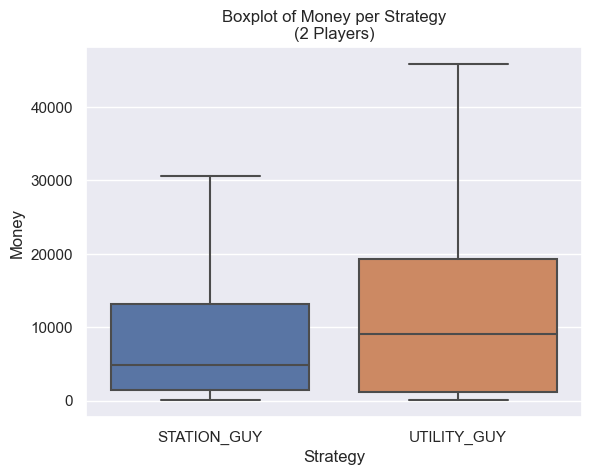

In [879]:
sns.boxplot(x='strategy', y='money', data=df, showfliers=False)
plt.title('Boxplot of Money per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Money')
plt.show();

From the boxplot, on average, Station Guy and Utility Guy roughly win with the same amount of money. However, The spread of Utility Guy is larger.

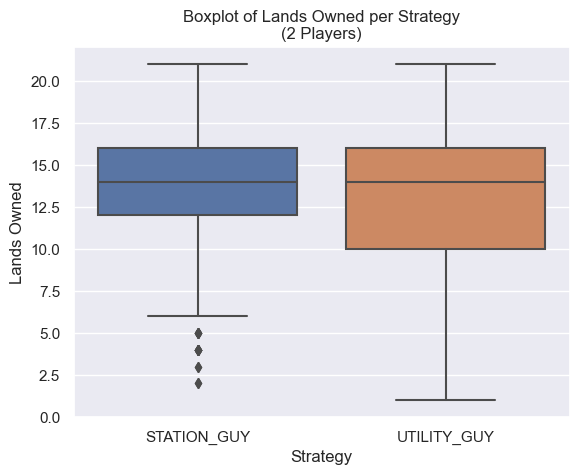

In [880]:
sns.boxplot(x='strategy', y='totalLandsOwned', data=df)
plt.title('Boxplot of Lands Owned per Strategy\n(2 Players)')
plt.xlabel('Strategy')
plt.ylabel('Lands Owned')
plt.show();

From the boxplot, on average, Station Guy and Utility Guy roughly win with the same number of lands owned. However, The spread of Utility Guy is larger.

## All!

In [881]:
df = pd.read_csv('./data_unused/AllStrategies.csv')
df.dropna(inplace=True)
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
3,DEFAULT,16746.0,5.0,0.0,1.0,6.0
6,GREEDY,19186.0,8.0,0.0,1.0,9.0
8,GREEDY,18068.0,9.0,0.0,0.0,9.0
11,DEFAULT,83817.0,6.0,1.0,1.0,8.0
19,GREEDY,14637.0,8.0,2.0,0.0,10.0


In [882]:
df.groupby("strategy").median()

,money,countries,utilities,stations,totalLandsOwned
strategy,,,,,
DEFAULT,40819.5,7.0,0.0,0.0,8.0
GREEDY,21572.0,9.0,0.0,1.0,10.0
STATION_GUY,41457.0,5.0,0.0,1.0,8.0
STINGY,77198.5,4.0,0.0,0.0,4.5
UTILITY_GUY,40519.0,5.0,1.0,0.0,7.0


In [883]:
df['strategy'].value_counts(normalize=True)


GREEDY         0.533911
DEFAULT        0.178932
STATION_GUY    0.150072
UTILITY_GUY    0.125541
STINGY         0.011544
Name: strategy, dtype: float64

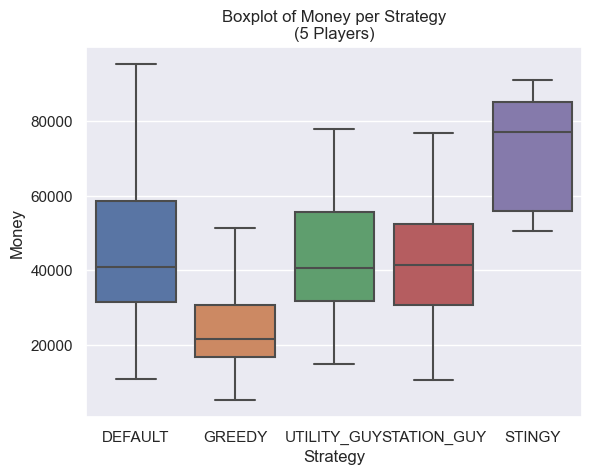

In [884]:
sns.boxplot(x='strategy', y='money', data=df, showfliers=False)
plt.title('Boxplot of Money per Strategy\n(5 Players)')
plt.xlabel('Strategy')
plt.ylabel('Money')
plt.show();

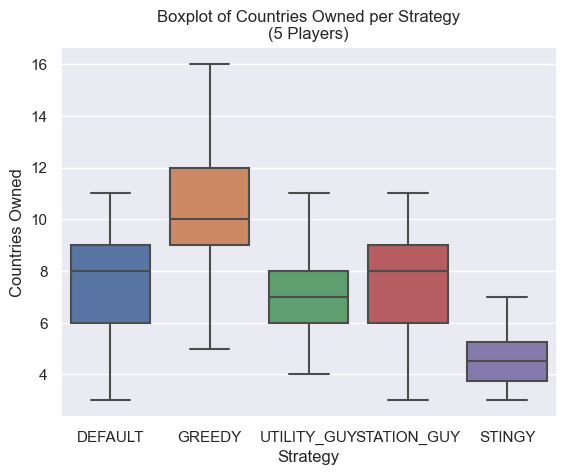

In [885]:
sns.boxplot(x='strategy', y='totalLandsOwned', data=df, showfliers=False)
plt.title('Boxplot of Countries Owned per Strategy\n(5 Players)')
plt.xlabel('Strategy')
plt.ylabel('Countries Owned')
plt.show();

## Does monopoly game tend to go to infinity 12% of the time?

In [886]:
df = pd.read_csv('./data_unused/DefaultDefault.csv')
df.head()

,strategy,money,countries,utilities,stations,totalLandsOwned
0,DEFAULT,838.0,8.0,1.0,3.0,12.0
1,DEFAULT,12511.0,11.0,1.0,2.0,14.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,DEFAULT,7900.0,13.0,1.0,3.0,17.0


In [887]:
df.shape

(2000, 6)

In [888]:
non_ending = df.isna().sum()[0]

In [889]:
## sample proportion is 12% ?

In [890]:
boots = []
for _ in range(1000):
    boot = df.sample(df.shape[0], replace=True)
    p_hat = boot.isna().sum()[0]/boot.shape[0]
    boots.append(p_hat)


(0.1094995, 0.1145)

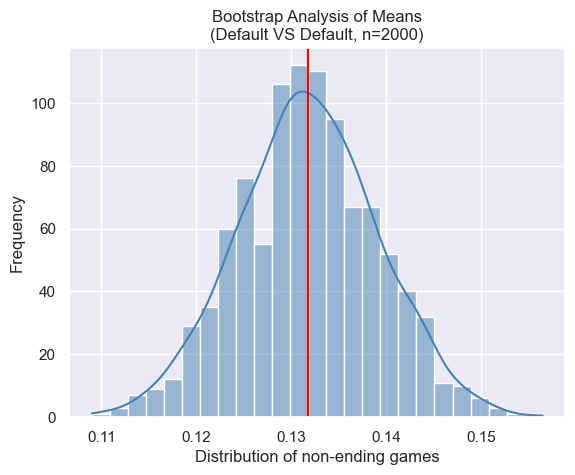

In [891]:
sns.histplot(boots, color='steelBlue', kde=True)
plt.xlabel("Distribution of non-ending games")
plt.ylabel("Frequency")
plt.title(f"Bootstrap Analysis of Means\n(Default VS Default, n={df.shape[0]})")
plt.axvline(np.mean(boots), color='red')
np.percentile(boots, 0.025), np.percentile(boots, 0.975)

Greedy vs Stingy:

Our examination, detailed in Table 1.0, reveals that Greedy consistently outperforms Stingy in terms of average land ownership and financial gains, resulting in a commendable 58% win rate. To assess the statistical significance of this difference, bootstrapping was employed to generate multiple simulations from the dataset.

The results of our analysis, illustrated in Figures 1.0 to 1.3, underscore the distinct distributions of means between Greedy and Stingy. The 95% confidence interval (0.09, 0.11) excludes 0, signaling a statistically significant advantage for Greedy with 95% confidence. The box plots in Figure 1.2 and 1.3 provide further granularity, indicating that Greedy tends to conclude rounds with a financial range of $2000 to $5000 and approximately 20 owned lands. In contrast, Stingy tends to finish rounds with just under $2000 and roughly 4 owned lands.

In summary, our data strongly suggests that, in a 2-player game, Greedy is more likely to emerge victorious over Stingy.

Station Guy vs Utility Guy:

Table 2.0 presents a comparative analysis of Station Guy and Utility Guy in 2-player games. Both strategies exhibit similar land distributions, barring stations, with Utility Guy consistently concluding the game with more monetary assets on average.

Our statistical analysis, employing bootstrapping and illustrated in Figures 2.0 to 2.3, further reinforces the differences in performance. Station Guy secures victory in approximately 59% of games, while Utility Guy achieves success in 41%. The 95% confidence interval (0.18, 0.20) excludes 0, affirming the statistical significance of Station Guy's superiority with 95% confidence.

The box plots in Figure 2.2 and 2.3 provide additional insights, indicating that Station Guy tends to conclude rounds with a financial range of a couple of thousand to $13,000 and around 14 owned lands. In contrast, Utility Guy ends rounds with a broader financial range of a couple of thousand to $20,000 while maintaining the same number of owned lands, 14.

In conclusion, our comprehensive analysis points to Station Guy as the more likely victor in a 2-player game over Utility Guy.